In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
from google.colab import drive
drive.mount("/content/drive")   #luu vao thu muc trong drive(neu khong sau 12h se bi xoa)

In [ ]:
pwd


In [ ]:
cd /content/drive/MyDrive/Traffic sign recognition

In [ ]:
pwd

'/content/drive/MyDrive/ML'

In [ ]:
ls

Nhandienbienbaogiaothon.ipynb  test.p  traffic-signs-data.zip  train.p  valid.p


In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=e36ad47e37c81a37d2ce2d2746dfb57ab381f72fdb32e134c48a7e0608aa5e7a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data (1).zip'

In [ ]:
data = "./"  #dat thu muc data de giai nen cho thu muc hien tai

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_link = data +"train.p"
valid_link = data + "valid.p"
test_link = data+"test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link,mode="rb") as f:
  train = pickle.load(f)

In [ ]:
with open(valid_link,mode="rb") as f:
  valid = pickle.load(f)

In [ ]:
with open(test_link,mode="rb") as f:
  test = pickle.load(f)

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [ ]:
train_x = train["features"]
train_y = train["labels"]


In [ ]:
train_x.shape

(34799, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

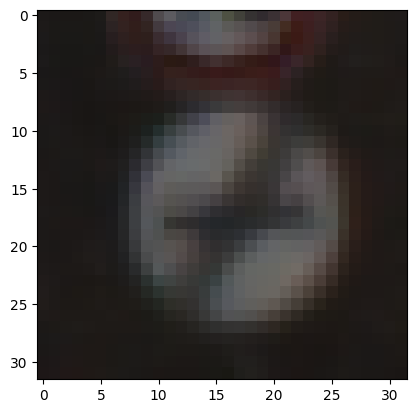

In [ ]:
plt.imshow(train_x[0])

In [ ]:
train_y[50]

41

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [ ]:
classNames[train_y[50]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle

In [ ]:
train_x, train_y= shuffle(train_x,train_y)


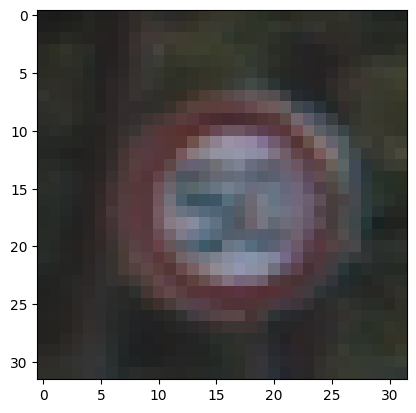

In [ ]:
plt.imshow(train_x[0])

In [ ]:
classNames[train_y[0]]

'Speed limit (50km/h)'

In [ ]:
valid_x = valid["features"]
valid_y = valid["labels"]

In [ ]:
test_x = test["features"]
test_y = test["labels"]

In [ ]:
train_x = train_x.astype("float")/255.0
valid_x = valid_x.astype("float")/255.0
test_x = test_x.astype("float")/255.0

In [ ]:
train_x[0]

array([[[0.11764706, 0.11372549, 0.11372549],
        [0.10980392, 0.10588235, 0.10588235],
        [0.11764706, 0.11372549, 0.10980392],
        ...,
        [0.12941176, 0.14901961, 0.1372549 ],
        [0.12941176, 0.14901961, 0.1372549 ],
        [0.11764706, 0.1372549 , 0.12156863]],

       [[0.12156863, 0.11764706, 0.11372549],
        [0.12156863, 0.12156863, 0.11372549],
        [0.1254902 , 0.1254902 , 0.11372549],
        ...,
        [0.15686275, 0.17254902, 0.15294118],
        [0.15294118, 0.16470588, 0.14509804],
        [0.15686275, 0.16862745, 0.14901961]],

       [[0.14117647, 0.1372549 , 0.12156863],
        [0.14117647, 0.14117647, 0.11764706],
        [0.15294118, 0.16078431, 0.1372549 ],
        ...,
        [0.14509804, 0.15686275, 0.13333333],
        [0.14901961, 0.15686275, 0.13333333],
        [0.15294118, 0.15686275, 0.12941176]],

       ...,

       [[0.16078431, 0.15294118, 0.14901961],
        [0.16470588, 0.15686275, 0.14509804],
        [0.17647059, 0

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
train_y = lb.fit_transform(train_y)

In [ ]:
valid_y = lb.fit_transform(valid_y)

In [ ]:
valid["labels"][0]

41

In [ ]:
valid_y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
#Goi model
model = Sequential()

In [ ]:
#Dinh nghia dau vao
width = 32
height = 32
classes = 43


In [ ]:
shape = (32,32,3)

In [ ]:
#Thiet lap Conv2D
model.add(Conv2D(32,(3,3), padding="same",input_shape=shape))

In [ ]:
model.add(Activation("relu")) #la 1 ham de hoc, khong phai de bien doi nen Param = 0

In [ ]:
model.add(BatchNormalization()) #phan bo cua data dong nhat hon voi data ban dau

In [ ]:
model.add(Conv2D(32,(3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64,(3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64,(3,3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2,horizontal_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 10
batch_size = 64

In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
print("Start traing")
H =model.fit_generator(aug.flow(train_x,train_y,batch_size=batch_size),validation_data=(valid_x,valid_y),steps_per_epoch=train_x.shape[0]//batch_size,epochs=epochs,verbose=1)

Start traing


<ipython-input-81-65e2622330ca>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H =model.fit_generator(aug.flow(train_x,train_y,batch_size=batch_size),validation_data=(valid_x,valid_y),steps_per_epoch=train_x.shape[0]//batch_size,epochs=epochs,verbose=1)


Epoch 1/10
543/543 [==============================] - 44s 53ms/step - loss: 1.2652 - accuracy: 0.6265 - val_loss: 1.0976 - val_accuracy: 0.6583
Epoch 2/10
543/543 [==============================] - 31s 57ms/step - loss: 0.3058 - accuracy: 0.9036 - val_loss: 0.6186 - val_accuracy: 0.8079
Epoch 3/10
543/543 [==============================] - 25s 46ms/step - loss: 0.1508 - accuracy: 0.9550 - val_loss: 0.4823 - val_accuracy: 0.8590
Epoch 4/10
543/543 [==============================] - 25s 46ms/step - loss: 0.1031 - accuracy: 0.9693 - val_loss: 0.4647 - val_accuracy: 0.8730
Epoch 5/10
543/543 [==============================] - 25s 46ms/step - loss: 0.0717 - accuracy: 0.9790 - val_loss: 0.4195 - val_accuracy: 0.8887
Epoch 6/10
543/543 [==============================] - 25s 46ms/step - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.5387 - val_accuracy: 0.8778
Epoch 7/10
543/543 [==============================] - 23s 43ms/step - loss: 0.0435 - accuracy: 0.9876 - val_loss: 0.4788 - val_accuracy:

In [ ]:
model.save("nhandangbienbaogiaothong.h5")

In [ ]:
saved_model = tf.keras.models.load_model("nhandangbienbaogiaothong.h5")  #luu vao bien saved_model

In [ ]:
result = saved_model.predict(test_x[1:2])    #du doan anh so 1, neu anh so 100 thi test_x[100:101]

1/1 [==============================] - 0s 380ms/step


In [ ]:
result


array([[1.07770640e-04, 9.97854054e-01, 3.57278259e-05, 1.57328270e-06,
        6.35449484e-04, 8.46478433e-05, 1.06255425e-06, 1.15040766e-09,
        1.55235084e-05, 2.35505198e-08, 5.25157532e-07, 9.17259371e-08,
        7.11050507e-09, 7.20943888e-07, 2.17010756e-06, 2.73415459e-08,
        1.57562806e-06, 1.34955741e-07, 5.16675413e-04, 1.66870518e-06,
        7.56269003e-08, 1.01822989e-04, 1.27325706e-08, 1.60634215e-07,
        2.20432179e-04, 7.09327779e-08, 3.00226901e-08, 1.47885487e-06,
        2.99697131e-04, 1.73289095e-07, 1.81500297e-07, 4.61735716e-08,
        3.87264549e-07, 3.87527416e-06, 2.28343623e-07, 4.67534883e-05,
        2.85839778e-05, 6.45279670e-06, 3.69303166e-07, 2.91847954e-07,
        2.72332290e-05, 8.41640599e-07, 1.29273462e-06]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
final =np.argmax(result)  #tim vi tri co xac suat lon nhat

In [ ]:
final = classNames[final]  #Mapping voi classNames

In [ ]:
final

'Speed limit (30km/h)'

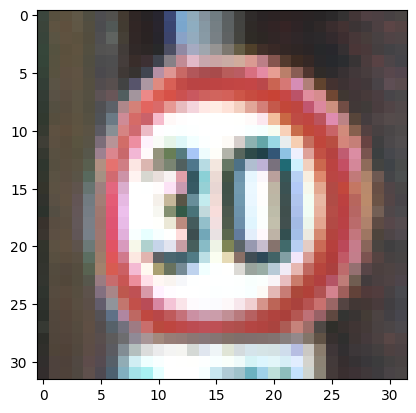

In [ ]:
plt.imshow(test["features"][1])